<a href="https://colab.research.google.com/github/ikabrain/UML501-IKANSH-MAHAJAN-102303754-LabAssignments/blob/main/ML_assign3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab Assignment 3
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Q1: K-Fold Cross Validation for Multiple Linear Regression (Least Square Error Fit)
---

Download the dataset regarding USA House Price Prediction from the following link:

https://drive.google.com/file/d/1O_NwpJT-8xGfU_-3llUl2sgPu0xllOrX/view?usp=sharing

Load the dataset and Implement 5-fold cross validation for multiple linear regression (using least square error fit).

In [2]:
# # Uncomment this if uploading CSV from local machine:-
# from google.colab import files
# uploaded = files.upload()
# housing_parent = "/content"

In [3]:
from google.colab import drive
drive.mount('/content/drive')
housing_parent = "/content/drive/MyDrive" # Replace with path of dataset in Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv(housing_parent + "/USA_Housing.csv")
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


Steps:-
### 1. Divide the dataset into input features (all columns except price) and output variable (price)

In [5]:
input_df = df.drop("Price", axis=1)
input_df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.45857,5.682861,7.009188,4.09,23086.80050
1,79248.64245,6.002900,6.730821,3.09,40173.07217
2,61287.06718,5.865890,8.512727,5.13,36882.15940
3,63345.24005,7.188236,5.586729,3.26,34310.24283
4,59982.19723,5.040555,7.839388,4.23,26354.10947


In [6]:
output_df = df["Price"]
output_df.head()

,Price
0,1.059034e+06
1,1.505891e+06
2,1.058988e+06
3,1.260617e+06
4,6.309435e+05


In [7]:
X = input_df.to_numpy()
y = output_df.to_numpy()
print("Size of input  matrix =", X.shape)
print("Size of output matrix =", y.shape)

Size of input  matrix = (5000, 5)
Size of output matrix = (5000,)


### 2. Scale the values of input features.

In [8]:
# Linear regression will make more reliable predictions if your input and output variables have a GAUSSIAN distribution!
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [9]:
# Displaying result
print("First row of unscaled data:", X[0].tolist())
print("First row of scaled   data:", X_scaled[0].tolist())

First row of unscaled data: [79545.45857, 5.682861322, 7.009188143, 4.09, 23086.8005]
First row of scaled   data: [1.028659694442657, -0.29692704505027545, 0.0212743339309571, 0.08806222101043115, -1.3175986717917167]


### 3. Divide input and output features into five folds.

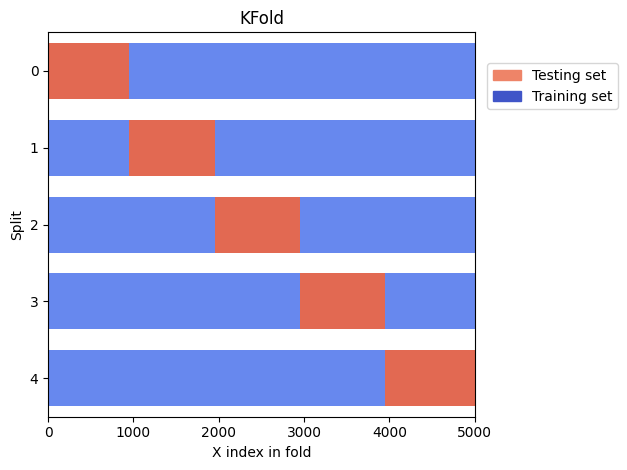

In [10]:
# 5 folds => 5 partitions for train-test split
# We use KFold(n_splits).split(X, y=None) => Returns arrays of (train_indices_fold, test_indices_fold) for each split!

from sklearn.model_selection import KFold
from matplotlib.patches import Patch

n_splits=5

kf = KFold(n_splits)
kf_splits = kf.split(X_scaled, y)

# Visualising the train-test folds
for i_split, (train_idx, test_idx) in enumerate(kf_splits):
    indices = np.full(len(X), np.nan)
    indices[test_idx], indices[train_idx] = 1, 0
    plt.scatter(
            range(len(indices)),
            [i_split + 0.5] * len(indices),
            c=indices,
            marker="_",
            lw=40,
            cmap=plt.cm.coolwarm, # type: ignore
            vmin=-0.2, vmax=1.2
        )

y_ticks = np.arange(n_splits) + 0.5
plt.yticks(y_ticks, range(n_splits)) # type: ignore

plt.xlim([0, len(X)])
plt.ylim([n_splits, 0])

plt.xlabel("X index in fold")
plt.ylabel("Split")

legend_patches = [
    Patch(color=plt.cm.coolwarm(0.8), label="Testing set"),
    Patch(color=plt.cm.coolwarm(0.02), label="Training set"),
]
plt.legend(handles=legend_patches, loc=(1.03, 0.8))
plt.title("KFold")

plt.tight_layout()
plt.show()

### 4. Run five iterations, in each iteration consider one-fold as test set and remaining four sets as training set. Find the beta (𝛽) matrix, predicted values, and R2_score for each iteration using least square error fit.

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
kf_splits = kf.split(X_scaled, y)

lr = LinearRegression()
betas, r2_scores = [], []

for i_split, (train_idx, test_idx) in enumerate(kf_splits):
    print(f"FOLD {i_split}:-")

    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    lr.fit(X_train, y_train)
    betas.append(np.insert(lr.coef_, 0, lr.intercept_))
    print(f"\t\u03B2 = {betas[-1].tolist()}")

    y_pred = lr.predict(X_test)
    print(f"\tFirst 5 Predicted values = {y_pred[:5].tolist()}")

    r2_scores.append(r2_score(y_test, y_pred))
    print(f"\tR2_score = {r2_scores[-1]}")
    print()

FOLD 0:-
	β = [1231872.077046121, 229923.70318635314, 164052.9857901133, 120923.57426578886, 3533.774709725316, 151855.5854248774]
	First 5 Predicted values = [1222472.597897158, 1494131.1519735823, 1253670.8024207845, 1120389.1987766211, 844315.1900547368]
	R2_score = 0.9175899480765107

FOLD 1:-
	β = [1232586.4045340156, 228365.3228705397, 165201.14881926888, 122539.46855211034, 1697.0343345803612, 150055.81710562017]
	First 5 Predicted values = [950080.8220609296, 711724.2660879802, 1770455.578197689, 764563.8827197738, 1572061.163162715]
	R2_score = 0.920301549640113

FOLD 2:-
	β = [1231448.0906337101, 230730.20810581543, 163554.55706975787, 121669.08713232595, 2620.2521505382756, 150923.12489297602]
	First 5 Predicted values = [1231513.1488610166, 1321188.7820471781, 725691.268101346, 932558.6195386339, 1049638.8423875966]
	R2_score = 0.9152429915320016

FOLD 3:-
	β = [1231447.0654361078, 229921.55808488023, 164523.05364133025, 119737.50719162646, 1124.2565875342407, 151317.802396

### 5. Use the best value of beta (𝛽) matrix (for which R2_score is maximum), to train the regressor for 70% of data and test the performance for remaining 30% data.

In [12]:
# Step-1: Finding best coefficients and indices
best_idx = np.argmax(r2_scores)
best_beta = betas[best_idx]
best_coeff = best_beta[1:]
best_intercept = best_beta[0]
best_r2 = r2_scores[best_idx]

print(f"Fold {best_idx} has the best R\u00B2 = {best_r2}")
print(f"with coefficients = {best_coeff.tolist()}")
print(f"& intercept = {best_intercept}")

Fold 3 has the best R² = 0.9208503836977656
with coefficients = [229921.55808488023, 164523.05364133025, 119737.50719162646, 1124.2565875342407, 151317.8023961073]
& intercept = 1231447.0654361078


In [13]:
# Step-2: 70-30 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [14]:
# Step-3: Train a regressor using holdout

lr_holdout = LinearRegression()
lr_holdout.fit(X_train, y_train)

y_pred = lr_holdout.predict(X_test)
print(f"R2_score for holdout method = {r2_score(y_test, y_pred)}")

R2_score for holdout method = 0.9146818498916267


In [15]:
# Step-4: Compare with Cross-validated β matrix

y_pred = X_test.dot(best_coeff) + best_intercept
print(f"R2_score for cross-validated method = {r2_score(y_test, y_pred)}")

R2_score for cross-validated method = 0.9146868482147401


## Q2: Concept of Validation set for Multiple Linear Regression (Gradient Descent Optimization)
---

Consider the same dataset of Q1, rather than dividing the dataset into five folds, divide the
dataset into training set (56%), validation set (14%), and test set (30%).
Consider four different values of learning rate i.e. {0.001,0.01,0.1,1}. Compute the values of
regression coefficients for each value of learning rate after 1000 iterations.
For each set of regression coefficients, compute R2_score for validation and test set and find
the best value of regression coefficients.

In [16]:
# Dividing dataset into 70% training, 30% testing, and dividing the training into 80% training, 20% validation!

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(f"Data in training set = {X_train.shape[0]}")
print(f"Data in validation set = {X_val.shape[0]}")
print(f"Data in testing set = {X_test.shape[0]}")

Data in training set = 2800
Data in validation set = 700
Data in testing set = 1500


In [17]:
# Gradient-Descent function for multiple linear regression (using sum of residual squares)

# Step-1: Find gradient of the loss function
def D_SSE(X, y, beta):
    # We assume that X has bias column of 1’s for intercept β0
    X = np.insert(X, 0, 1, axis=1)
    n = X.shape[0]
    return (-1/n) * (X.T @ (y - (X @ beta)))

def GDLinearRegression(X, y, lr=0.01, n_iter=1000):
    # Step-2: Assume initial constants = 0
    n, k = X.shape
    beta = np.zeros(k+1) # Intercept + coefficients

    for _ in range(n_iter):
        # Step-3: Find gradient at assumed coefficients
        grad = D_SSE(X, y, beta)
        # Step-4: Step size
        step_size = grad * lr
        # Step-5: New beta
        beta -= step_size

    return beta

In [18]:
# Running GDR for different learning rates and getting R2 score

lr = [0.001, 0.01, 0.1, 1]
epoch = 1000

betas = []
r2_val_scores = []
r2_test_scores = []
for l in lr:
    best_betas = GDLinearRegression(X_train, y_train, l, epoch)
    betas.append(best_betas)
    print(f"LEARNING RATE {l}:-")

    # Validation
    y_val_pred = (X_val @ best_betas[1:]) + best_betas[0]
    r2_val_scores.append(r2_score(y_val, y_val_pred))
    print(f"\tValidation R2 score = {r2_val_scores[-1]}")

    # Testing
    y_test_pred = (X_test @ best_betas[1:]) + best_betas[0]
    r2_test_scores.append(r2_score(y_test, y_test_pred))
    print(f"\tTesting    R2 score = {r2_test_scores[-1]}")
    print()

LEARNING RATE 0.001:-
	Validation R2 score = -0.8125204084681579
	Testing    R2 score = -0.9913653412488914

LEARNING RATE 0.01:-
	Validation R2 score = 0.9098183094422969
	Testing    R2 score = 0.9147434800538763

LEARNING RATE 0.1:-
	Validation R2 score = 0.9097995626742027
	Testing    R2 score = 0.9147570103083724

LEARNING RATE 1:-
	Validation R2 score = 0.9097995626742028
	Testing    R2 score = 0.9147570103083724



In [19]:
# Getting best learning rate

best_val_idx = np.argmax(r2_val_scores)
best_test_idx = np.argmax(r2_test_scores)

print(f"Best learning rate for validation set = {lr[best_val_idx]} with")
print(f"\tValidation R2 score = {r2_val_scores[best_val_idx]}")
print(f"\tTesting    R2 score = {r2_test_scores[best_val_idx]}")
print(f"\tBeta values = {betas[best_val_idx].tolist()}")

print()

print(f"Best learning rate for testing set = {lr[best_test_idx]} with")
print(f"\tValidation R2 score = {r2_val_scores[best_test_idx]}")
print(f"\tTesting    R2 score = {r2_test_scores[best_test_idx]}")
print(f"\tBeta values = {betas[best_test_idx].tolist()}")

Best learning rate for validation set = 0.01 with
	Validation R2 score = 0.9098183094422969
	Testing    R2 score = 0.9147434800538763
	Beta values = [1232562.5125491922, 230048.7666468831, 163686.93503606413, 121406.94107918287, 3117.473639326378, 150655.9745971444]

Best learning rate for testing set = 0.1 with
	Validation R2 score = 0.9097995626742027
	Testing    R2 score = 0.9147570103083724
	Beta values = [1232618.3201184147, 230067.98894639732, 163710.33259401194, 121681.42752283493, 2832.150665207998, 150657.52262836235]


## Q3: Pre-processing and Multiple Linear Regression
---

Download the dataset regarding Car Price Prediction from the following link:
https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data

In [20]:
car_parent = "/content/drive/MyDrive/car-price-prediction" # Replace with path of dataset in Drive

### 1. Load the dataset with following column names

["symboling", "normalized_losses", "make", "fuel_type", "aspiration","num_doors", "body_style", "drive_wheels", "engine_location", "wheel_base", "length", "width", "height", "curb_weight", "engine_type", "num_cylinders", "engine_size", "fuel_system", "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm", "city_mpg", "highway_mpg", "price"]

and replace all ? values with NaN

In [21]:
df = pd.read_csv(
    car_parent + "/imports-85.data",
    sep=",",
    header=None,
    names=["symboling", "normalized_losses", "make", "fuel_type", "aspiration", "num_doors", "body_style", "drive_wheels", "engine_location", "wheel_base", "length", "width", "height", "curb_weight", "engine_type", "num_cylinders", "engine_size", "fuel_system", "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm", "city_mpg", "highway_mpg", "price"]
)

for col in df.columns:
    df[col] = df[col].replace("?", np.nan)

df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_doors          203 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_cylinders      205 non-null    object 
 16  engine_size        205 non

In [23]:
change_dtype = ["normalized_losses", "bore", "stroke", "horsepower", "peak_rpm", "price"]

df[change_dtype] = df[change_dtype].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_doors          203 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_cylinders      205 non-null    object 
 16  engine_size        205 non

### 2. Replace all NaN values with central tendency imputation. Drop the rows with NaN values in price column

In [24]:
df.isna().sum()

,0
symboling,0
normalized_losses,41
make,0
fuel_type,0
aspiration,0
num_doors,2
body_style,0
drive_wheels,0
engine_location,0
wheel_base,0


In [25]:
numeric_with_nan = df.select_dtypes(include='number').columns[df.select_dtypes(include='number').isna().any()].tolist()
categorical_with_nan = df.select_dtypes(exclude='number').columns[df.select_dtypes(exclude='number').isna().any()].tolist()

print("Numeric columns having NaN values:", numeric_with_nan)
print("Categorical columns having NaN values:", categorical_with_nan)

Numeric columns having NaN values: ['normalized_losses', 'bore', 'stroke', 'horsepower', 'peak_rpm', 'price']
Categorical columns having NaN values: ['num_doors']


In [26]:
df_imputed = df.copy(deep=True)

target_cols = ["price"]

for col in numeric_with_nan:
    if col not in target_cols:
        df_imputed[col] = df[col].fillna(df[col].median())

for col in categorical_with_nan:
    if col not in target_cols:
        df_imputed[col] = df[col].fillna(df[col].mode()[0])

# Confirming if any nulls are left
df_imputed.drop(columns=target_cols).isna().any().any()

np.False_

In [27]:
# Dropping rows with NaN price
df_imputed_full = df_imputed.dropna(subset=['price'])
df_imputed_full.isna().any().any()

np.False_

### 3. There are 10 columns in the dataset with non-numeric values. Convert these values to numeric values using following scheme:

#### (i) For “num_doors” and “num_cylinders”: convert words (number names) to figures for e.g., two to 2

In [28]:
num_word_cols = ["num_doors", "num_cylinders"]

df_imputed[num_word_cols].value_counts()

num_doors  num_cylinders
four       four             93
two        four             66
four       six              13
two        six              11
four       five              8
two        two               4
           five              3
           eight             3
four       eight             2
two        three             1
           twelve            1
Name: count, dtype: int64

In [29]:
df_num = df_imputed_full.copy(deep=True)

df_num[num_word_cols] = df_imputed_full[num_word_cols].replace({"two": 2, "three": 3, "four": 4, "five": 5, "six": 6, "eight": 8, "twelve": 12})
df_num[num_word_cols] = df_num[num_word_cols].astype(int)
df_num[num_word_cols].value_counts()

/tmp/ipython-input-2959729692.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_num[num_word_cols] = df_imputed_full[num_word_cols].replace({"two": 2, "three": 3, "four": 4, "five": 5, "six": 6, "eight": 8, "twelve": 12})


num_doors  num_cylinders
4          4                92
2          4                65
4          6                13
2          6                11
4          5                 8
2          2                 4
           5                 2
4          8                 2
2          8                 2
           3                 1
           12                1
Name: count, dtype: int64

#### (ii) For "body_style", "drive_wheels": use dummy encoding scheme

In [30]:
df_dummy = pd.get_dummies(data=df_num, columns=["body_style", "drive_wheels"], prefix=["body_style", "drive_wheels"], drop_first=True, dtype=int)
df_dummy.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,engine_location,wheel_base,length,width,...,peak_rpm,city_mpg,highway_mpg,price,body_style_hardtop,body_style_hatchback,body_style_sedan,body_style_wagon,drive_wheels_fwd,drive_wheels_rwd
0,3,115.0,alfa-romero,gas,std,2,front,88.6,168.8,64.1,...,5000.0,21,27,13495.0,0,0,0,0,0,1
1,3,115.0,alfa-romero,gas,std,2,front,88.6,168.8,64.1,...,5000.0,21,27,16500.0,0,0,0,0,0,1
2,1,115.0,alfa-romero,gas,std,2,front,94.5,171.2,65.5,...,5000.0,19,26,16500.0,0,1,0,0,0,1
3,2,164.0,audi,gas,std,4,front,99.8,176.6,66.2,...,5500.0,24,30,13950.0,0,0,1,0,1,0
4,2,164.0,audi,gas,std,4,front,99.4,176.6,66.4,...,5500.0,18,22,17450.0,0,0,1,0,0,0


#### (iii) For “make”, “aspiration”, “engine_location”, "fuel_type": use label encoding scheme

In [47]:
from sklearn.preprocessing import LabelEncoder

df_label = df_dummy.copy()
le = LabelEncoder()

for col in ["make", "aspiration", "engine_location", "fuel_type"]:
    df_label[col] = le.fit_transform(df_dummy[col])

df_label.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,engine_location,wheel_base,length,width,...,peak_rpm,city_mpg,highway_mpg,price,body_style_hardtop,body_style_hatchback,body_style_sedan,body_style_wagon,drive_wheels_fwd,drive_wheels_rwd
0,3,115.0,0,1,0,2,0,88.6,168.8,64.1,...,5000.0,21,27,13495.0,0,0,0,0,0,1
1,3,115.0,0,1,0,2,0,88.6,168.8,64.1,...,5000.0,21,27,16500.0,0,0,0,0,0,1
2,1,115.0,0,1,0,2,0,94.5,171.2,65.5,...,5000.0,19,26,16500.0,0,1,0,0,0,1
3,2,164.0,1,1,0,4,0,99.8,176.6,66.2,...,5500.0,24,30,13950.0,0,0,1,0,1,0
4,2,164.0,1,1,0,4,0,99.4,176.6,66.4,...,5500.0,18,22,17450.0,0,0,1,0,0,0


#### (iv) For fuel_system: replace values containing string pfi to 1 else all values to 0.

In [48]:
df_fuel = df_label.copy()

df_fuel["fuel_system"] = df_label["fuel_system"].str.contains("pfi").astype(int)

df_fuel.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,engine_location,wheel_base,length,width,...,peak_rpm,city_mpg,highway_mpg,price,body_style_hardtop,body_style_hatchback,body_style_sedan,body_style_wagon,drive_wheels_fwd,drive_wheels_rwd
0,3,115.0,0,1,0,2,0,88.6,168.8,64.1,...,5000.0,21,27,13495.0,0,0,0,0,0,1
1,3,115.0,0,1,0,2,0,88.6,168.8,64.1,...,5000.0,21,27,16500.0,0,0,0,0,0,1
2,1,115.0,0,1,0,2,0,94.5,171.2,65.5,...,5000.0,19,26,16500.0,0,1,0,0,0,1
3,2,164.0,1,1,0,4,0,99.8,176.6,66.2,...,5500.0,24,30,13950.0,0,0,1,0,1,0
4,2,164.0,1,1,0,4,0,99.4,176.6,66.4,...,5500.0,18,22,17450.0,0,0,1,0,0,0


#### (v) For engine_type: replace values containing string ohc to 1 else all values to 0.

In [49]:
df_engine = df_fuel.copy()

df_engine["engine_type"] = df_fuel["engine_type"].str.contains("ohc").astype(int)

df_engine.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,engine_location,wheel_base,length,width,...,peak_rpm,city_mpg,highway_mpg,price,body_style_hardtop,body_style_hatchback,body_style_sedan,body_style_wagon,drive_wheels_fwd,drive_wheels_rwd
0,3,115.0,0,1,0,2,0,88.6,168.8,64.1,...,5000.0,21,27,13495.0,0,0,0,0,0,1
1,3,115.0,0,1,0,2,0,88.6,168.8,64.1,...,5000.0,21,27,16500.0,0,0,0,0,0,1
2,1,115.0,0,1,0,2,0,94.5,171.2,65.5,...,5000.0,19,26,16500.0,0,1,0,0,0,1
3,2,164.0,1,1,0,4,0,99.8,176.6,66.2,...,5500.0,24,30,13950.0,0,0,1,0,1,0
4,2,164.0,1,1,0,4,0,99.4,176.6,66.4,...,5500.0,18,22,17450.0,0,0,1,0,0,0


In [50]:
df_engine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 0 to 204
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   symboling             201 non-null    int64  
 1   normalized_losses     201 non-null    float64
 2   make                  201 non-null    int64  
 3   fuel_type             201 non-null    int64  
 4   aspiration            201 non-null    int64  
 5   num_doors             201 non-null    int64  
 6   engine_location       201 non-null    int64  
 7   wheel_base            201 non-null    float64
 8   length                201 non-null    float64
 9   width                 201 non-null    float64
 10  height                201 non-null    float64
 11  curb_weight           201 non-null    int64  
 12  engine_type           201 non-null    int64  
 13  num_cylinders         201 non-null    int64  
 14  engine_size           201 non-null    int64  
 15  fuel_system           201 no

In [51]:
df_final = df_engine.copy()

### 4. Divide the dataset into input features (all columns except price) and output variable (price). Scale all input features.

In [57]:
X = df_final.drop("price", axis=1).to_numpy()
y = df_final["price"].to_numpy()
print("Size of input  matrix =", X.shape)
print("Size of output matrix =", y.shape)

Size of input  matrix = (201, 29)
Size of output matrix = (201,)


In [58]:
# Scaling input features
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

### 5. Train a linear regressor on 70% of data (using inbuilt linear regression function of Python) and test its performance on remaining 30% of data.

In [105]:
# Holdout
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [106]:
# Training model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [107]:
# Testing on 30%
from sklearn.metrics import r2_score

y_pred = lr.predict(X_test)
r2_before = r2_score(y_test, y_pred)
print(f"R2 score = {r2_before}")

R2 score = 0.8734104772978124


### 6. Reduce the dimensionality of the feature set using inbuilt PCA decomposition and then again train a linear regressor on 70% of reduced data (using inbuilt linear regression function of Python). Does it lead to any performance improvement on test set?

In [108]:
from sklearn.decomposition import PCA

pca = PCA(n_components="mle") # Estimates number of components automatically
X_pca = pca.fit_transform(X_scaled)

print(f"Number of features before PCA = {X_scaled.shape[1]}")
print(f"Number of PCs      after  PCA = {X_pca.shape[1]}")
print(f"Ratio of variance explained by PCs: {pca.explained_variance_ratio_.tolist()}")

Number of features before PCA = 29
Number of PCs      after  PCA = 28
Ratio of variance explained by PCs: [0.304280308223742, 0.15482386365682296, 0.08527127500555974, 0.06559329937014316, 0.06092368696293306, 0.05203042481341899, 0.03798629029548132, 0.03715358143384319, 0.02851664367090443, 0.0262428329384832, 0.022438000956527655, 0.02064447280932035, 0.018124673526940516, 0.015312812105195889, 0.012930403938583655, 0.011988937548321723, 0.011089574843282345, 0.009369334672793458, 0.006317080001282506, 0.005731274116444124, 0.0035599444511563347, 0.002708315680017582, 0.001942370352604735, 0.001640085854952987, 0.0013895629614798942, 0.0007468077103181563, 0.0005678388040090832, 0.0005170918833199891]


In [109]:
# Repeating previous train-test
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
r2_after = r2_score(y_test, y_pred)
print(f"R2 score before PCA with MLE = {r2_before:.5f}")
print(f"R2 score after  PCA with MLE = {r2_after:.5f}")

R2 score before PCA with MLE = 0.87341
R2 score after  PCA with MLE = 0.87892



Thus, there's a clear improvement in regression performance when selecting explained variances through principal components.